In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [4]:
url = 'https://raw.githubusercontent.com/PoornimasreJegannathan/ML_Project/main/datacleaning_1.csv'
copin1=pd.read_csv(url)
copin1.head()

<ipython-input-4-dd2e79a44166>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  copin1=pd.read_csv(url)


,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,S,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,S,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,PL,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,PL,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
copin1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178515 entries, 0 to 178514
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     178515 non-null  int64  
 1   id             178515 non-null  object 
 2   item_date      178515 non-null  float64
 3   quantity tons  178515 non-null  object 
 4   customer       178515 non-null  float64
 5   country        178515 non-null  float64
 6   status         178515 non-null  object 
 7   item type      178515 non-null  object 
 8   application    178515 non-null  float64
 9   thickness      178515 non-null  float64
 10  width          178515 non-null  float64
 11  material_ref   102042 non-null  object 
 12  product_ref    178515 non-null  int64  
 13  delivery date  178515 non-null  float64
 14  selling_price  178515 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 20.4+ MB


In [6]:
copin1=copin1.drop(['Unnamed: 0'],axis=1)

In [7]:
copin1= copin1.rename(columns={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'})

In [8]:
copin1['item_date']=pd.to_datetime(copin1['item_date'].astype(int).astype(str), format='%Y%m%d',errors='coerce')

In [9]:
copin1['delivery_date']=pd.to_datetime(copin1['delivery_date'].astype(int).astype(str), format='%Y%m%d',errors='coerce')

In [10]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178515 entries, 0 to 178514
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             178515 non-null  object        
 1   item_date      178513 non-null  datetime64[ns]
 2   quantity_tons  178515 non-null  object        
 3   customer       178515 non-null  float64       
 4   country        178515 non-null  float64       
 5   status         178515 non-null  object        
 6   item_type      178515 non-null  object        
 7   application    178515 non-null  float64       
 8   thickness      178515 non-null  float64       
 9   width          178515 non-null  float64       
 10  material_ref   102042 non-null  object        
 11  product_ref    178515 non-null  int64         
 12  delivery_date  178513 non-null  datetime64[ns]
 13  selling_price  178515 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(5

In [ ]:
##copin1['quantity_tons'] = copin1['quantity_tons'].astype(float)   got error

In [11]:
copin1['quantity_tons'] = pd.to_numeric( copin1['quantity_tons'], errors='coerce')

In [12]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178515 entries, 0 to 178514
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             178515 non-null  object        
 1   item_date      178513 non-null  datetime64[ns]
 2   quantity_tons  178514 non-null  float64       
 3   customer       178515 non-null  float64       
 4   country        178515 non-null  float64       
 5   status         178515 non-null  object        
 6   item_type      178515 non-null  object        
 7   application    178515 non-null  float64       
 8   thickness      178515 non-null  float64       
 9   width          178515 non-null  float64       
 10  material_ref   102042 non-null  object        
 11  product_ref    178515 non-null  int64         
 12  delivery_date  178513 non-null  datetime64[ns]
 13  selling_price  178515 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [13]:
copin1.dropna(subset='item_date', inplace=True)

In [14]:
copin1.dropna(subset='delivery_date', inplace=True)

In [15]:
copin1.dropna(subset='quantity_tons', inplace=True)

In [16]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178510 entries, 0 to 178514
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             178510 non-null  object        
 1   item_date      178510 non-null  datetime64[ns]
 2   quantity_tons  178510 non-null  float64       
 3   customer       178510 non-null  float64       
 4   country        178510 non-null  float64       
 5   status         178510 non-null  object        
 6   item_type      178510 non-null  object        
 7   application    178510 non-null  float64       
 8   thickness      178510 non-null  float64       
 9   width          178510 non-null  float64       
 10  material_ref   102041 non-null  object        
 11  product_ref    178510 non-null  int64         
 12  delivery_date  178510 non-null  datetime64[ns]
 13  selling_price  178510 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
mem

In [17]:
copin1.dropna(subset='material_ref', inplace=True)

In [18]:
copin1['material_ref']=copin1['material_ref'].astype(str)

In [19]:
copin1=copin1[~copin1['material_ref'].str.startswith('000000')]

In [20]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79484 entries, 0 to 178447
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             79484 non-null  object        
 1   item_date      79484 non-null  datetime64[ns]
 2   quantity_tons  79484 non-null  float64       
 3   customer       79484 non-null  float64       
 4   country        79484 non-null  float64       
 5   status         79484 non-null  object        
 6   item_type      79484 non-null  object        
 7   application    79484 non-null  float64       
 8   thickness      79484 non-null  float64       
 9   width          79484 non-null  float64       
 10  material_ref   79484 non-null  object        
 11  product_ref    79484 non-null  int64         
 12  delivery_date  79484 non-null  datetime64[ns]
 13  selling_price  79484 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
memory usage: 9.1+ M

In [21]:
copin1['date_diff'] = (pd.to_datetime(copin1['delivery_date']) - (pd.to_datetime(copin1['item_date']))).dt.days.abs()

In [22]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79484 entries, 0 to 178447
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             79484 non-null  object        
 1   item_date      79484 non-null  datetime64[ns]
 2   quantity_tons  79484 non-null  float64       
 3   customer       79484 non-null  float64       
 4   country        79484 non-null  float64       
 5   status         79484 non-null  object        
 6   item_type      79484 non-null  object        
 7   application    79484 non-null  float64       
 8   thickness      79484 non-null  float64       
 9   width          79484 non-null  float64       
 10  material_ref   79484 non-null  object        
 11  product_ref    79484 non-null  int64         
 12  delivery_date  79484 non-null  datetime64[ns]
 13  selling_price  79484 non-null  float64       
 14  date_diff      79484 non-null  int64         
dtypes: datetime64[ns](2), f

In [23]:
copin1.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,date_diff
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,S,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,PL,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,PL,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31
11,E7039921-5DE1-4FD1-93A3-C25F9C389B82,2021-04-01,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,DC04EK,628377,2021-07-01,973.00,91


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['status','application','customer','country']
copin1[cols] = copin1[cols].apply(le.fit_transform)

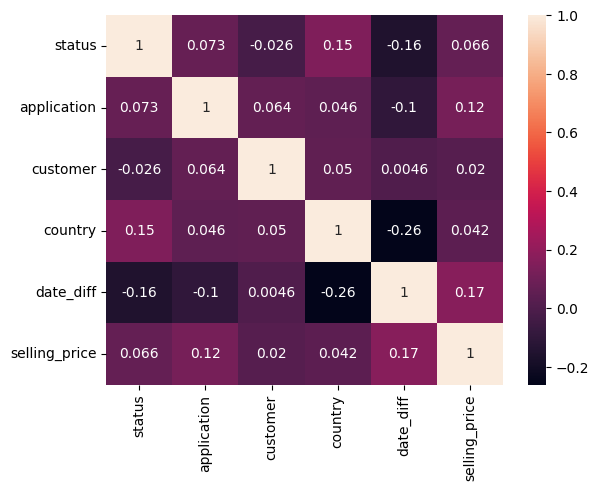

In [26]:
cols2=['status','application','customer','country','date_diff','selling_price']
sns.heatmap(copin1[cols2].corr(),annot=True)
plt.show()

In [27]:
copin1['matref_wd_th'] = copin1['material_ref'].astype(str) +"_"+ copin1['width'].astype(str) +"_"+copin1['thickness'].astype(str)

In [30]:
copin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79484 entries, 0 to 178447
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             79484 non-null  object        
 1   item_date      79484 non-null  datetime64[ns]
 2   quantity_tons  79484 non-null  float64       
 3   customer       79484 non-null  int64         
 4   country        79484 non-null  int64         
 5   status         79484 non-null  int64         
 6   item_type      79484 non-null  object        
 7   application    79484 non-null  int64         
 8   thickness      79484 non-null  float64       
 9   width          79484 non-null  float64       
 10  material_ref   79484 non-null  object        
 11  product_ref    79484 non-null  int64         
 12  delivery_date  79484 non-null  datetime64[ns]
 13  selling_price  79484 non-null  float64       
 14  date_diff      79484 non-null  int64         
 15  matref_wd_th   79484 no

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col1 = ['matref_wd_th']
copin1[col1] = copin1[col1].apply(le.fit_transform)

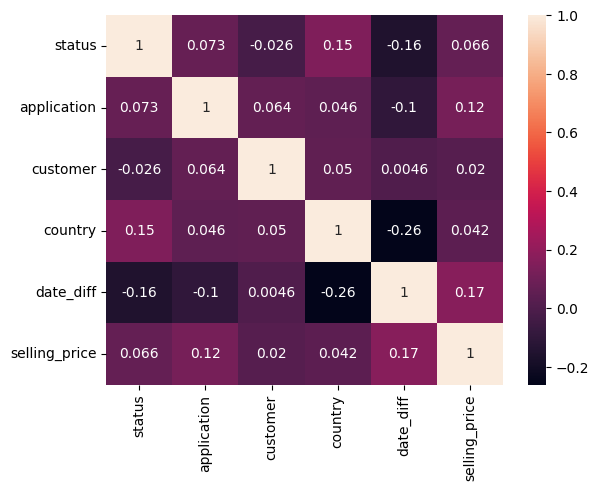

In [33]:
cols2=['status','application','customer','country','date_diff','selling_price']
sns.heatmap(copin1[cols2].corr(),annot=True)
plt.show()

In [34]:
Xe = copin1[['application','customer','country','date_diff','selling_price']].values
ye = copin1['status'].values

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(Xe,ye,stratify=ye)
# x_train, x_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.3, random_state=0)


In [62]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion="gini", max_depth = 4,random_state=0)
model.fit(x_train,y_train)
y_predict= model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7941724120577727


col_0,0,1
row_0,,
0,716,3466
1,624,15065


In [60]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.21      0.29      5085
           1       0.82      0.95      0.88     18761

    accuracy                           0.79     23846
   macro avg       0.67      0.58      0.59     23846
weighted avg       0.75      0.79      0.75     23846



# ***SMOTE-- DOESNOT IMPROVE ACCURACY***

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()  # Create an instance of SMOTE
# Xsm,ysm = smote.fit_resample(Xe, ye)
# X=Xsm
# y=ysm
# print(Xsm.shape)
# print(ysm.shape)

In [43]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix
# x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model= DecisionTreeClassifier(criterion="gini", max_depth = 4,random_state=0)
# model.fit(X,y)
# y_predict= model.predict(x_test)
# y_predict

In [ ]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test,y_predict))
# pd.crosstab(y_test,y_predict)

In [ ]:
# from sklearn.metrics import classification_report
# print (classification_report(y_test, y_predict))

# GRID IMPROVES ACCURACY from 79-93

In [82]:
params = {'max_depth': [2,4,6,8,10,12,14,16,18],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1,2]}

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)
model = gcv.best_estimator_
print(gcv.best_estimator_)

DecisionTreeClassifier(max_depth=18, random_state=0)


In [84]:
y_predict= model.predict(x_test)
y_predict

array([1, 1, 1, ..., 0, 0, 0])

In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9304010870112224


col_0,0,1
row_0,,
0,3473,709
1,674,15015


In [86]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4182
           1       0.95      0.96      0.96     15689

    accuracy                           0.93     19871
   macro avg       0.90      0.89      0.89     19871
weighted avg       0.93      0.93      0.93     19871



# RANDOM FOREST FURTHER IMPROVES FROM 93 TO 94.6

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [105]:
y_predict = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9463036585979568


col_0,0,1
row_0,,
0,3552,630
1,437,15252


In [106]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4182
           1       0.96      0.97      0.97     15689

    accuracy                           0.95     19871
   macro avg       0.93      0.91      0.92     19871
weighted avg       0.95      0.95      0.95     19871

